# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


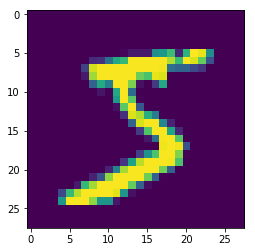

In [136]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Convolution2D, MaxPooling2D,GlobalAveragePooling2D

In [0]:
X_train.shape

(60000, 28, 28, 1)

In [0]:
# num_pixels = X_train.shape[1]*X_train.shape[2]
# X_train = X_train.reshape(X_train.shape[0],num_pixels).astype('float32')
# X_test = X_test.reshape(X_test.shape[0],num_pixels).astype('float32')


# num_pixels = X_train.shape[1] * X_train.shape[2]
# X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
# X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [0]:
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization

In [151]:
from keras.layers import Activation
model = Sequential()



#block 1 
model.add(Convolution2D(15, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Convolution2D(30, 3, 3, activation='relu')) #24
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(MaxPooling2D(pool_size=(2,2))) #12

 
#block 2
model.add(Convolution2D(15, 3, 3, activation='relu')) #10
model.add(BatchNormalization())
model.add(Convolution2D(30, 3, 3, activation='relu')) #8
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Convolution2D(10,1,activation='relu')) #8

model.add(Convolution2D(10,8)) #8



#model.add(Flatten())
model.add(GlobalAveragePooling2D())


model.add(Activation('softmax'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(15, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(30, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(15, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(30, (3, 3), activation="relu")`


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [152]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_116 (Conv2D)          (None, 26, 26, 15)        150       
_________________________________________________________________
batch_normalization_83 (Batc (None, 26, 26, 15)        60        
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 24, 24, 30)        4080      
_________________________________________________________________
batch_normalization_84 (Batc (None, 24, 24, 30)        120       
_________________________________________________________________
dropout_52 (Dropout)         (None, 24, 24, 30)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 10, 10, 15)        4065      
__________

In [0]:
from keras.optimizers import SGD
opt = SGD(lr=0.04, momentum=0.9)

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer=opt,
             metrics=['accuracy'])

In [0]:
from keras.callbacks import *

class CyclicLR(Callback):
    """This callback implements a cyclical learning rate policy (CLR).
    The method cycles the learning rate between two boundaries with
    some constant frequency, as detailed in this paper (https://arxiv.org/abs/1506.01186).
    The amplitude of the cycle can be scaled on a per-iteration or 
    per-cycle basis.
    This class has three built-in policies, as put forth in the paper.
    "triangular":
        A basic triangular cycle w/ no amplitude scaling.
    "triangular2":
        A basic triangular cycle that scales initial amplitude by half each cycle.
    "exp_range":
        A cycle that scales initial amplitude by gamma**(cycle iterations) at each 
        cycle iteration.
    For more detail, please see paper.
    
    # Example
        ```python
            clr = CyclicLR(base_lr=0.001, max_lr=0.006,
                                step_size=2000., mode='triangular')
            model.fit(X_train, Y_train, callbacks=[clr])
        ```
    
    Class also supports custom scaling functions:
        ```python
            clr_fn = lambda x: 0.5*(1+np.sin(x*np.pi/2.))
            clr = CyclicLR(base_lr=0.001, max_lr=0.006,
                                step_size=2000., scale_fn=clr_fn,
                                scale_mode='cycle')
            model.fit(X_train, Y_train, callbacks=[clr])
        ```    
    # Arguments
        base_lr: initial learning rate which is the
            lower boundary in the cycle.
        max_lr: upper boundary in the cycle. Functionally,
            it defines the cycle amplitude (max_lr - base_lr).
            The lr at any cycle is the sum of base_lr
            and some scaling of the amplitude; therefore 
            max_lr may not actually be reached depending on
            scaling function.
        step_size: number of training iterations per
            half cycle. Authors suggest setting step_size
            2-8 x training iterations in epoch.
        mode: one of {triangular, triangular2, exp_range}.
            Default 'triangular'.
            Values correspond to policies detailed above.
            If scale_fn is not None, this argument is ignored.
        gamma: constant in 'exp_range' scaling function:
            gamma**(cycle iterations)
        scale_fn: Custom scaling policy defined by a single
            argument lambda function, where 
            0 <= scale_fn(x) <= 1 for all x >= 0.
            mode paramater is ignored 
        scale_mode: {'cycle', 'iterations'}.
            Defines whether scale_fn is evaluated on 
            cycle number or cycle iterations (training
            iterations since start of cycle). Default is 'cycle'.
    """

    def __init__(self, base_lr=0.001, max_lr=0.006, step_size=2000., mode='triangular',
                 gamma=1., scale_fn=None, scale_mode='cycle'):
        super(CyclicLR, self).__init__()

        self.base_lr = base_lr
        self.max_lr = max_lr
        self.step_size = step_size
        self.mode = mode
        self.gamma = gamma
        if scale_fn == None:
            if self.mode == 'triangular':
                self.scale_fn = lambda x: 1.
                self.scale_mode = 'cycle'
            elif self.mode == 'triangular2':
                self.scale_fn = lambda x: 1/(2.**(x-1))
                self.scale_mode = 'cycle'
            elif self.mode == 'exp_range':
                self.scale_fn = lambda x: gamma**(x)
                self.scale_mode = 'iterations'
        else:
            self.scale_fn = scale_fn
            self.scale_mode = scale_mode
        self.clr_iterations = 0.
        self.trn_iterations = 0.
        self.history = {}

        self._reset()

    def _reset(self, new_base_lr=None, new_max_lr=None,
               new_step_size=None):
        """Resets cycle iterations.
        Optional boundary/step size adjustment.
        """
        if new_base_lr != None:
            self.base_lr = new_base_lr
        if new_max_lr != None:
            self.max_lr = new_max_lr
        if new_step_size != None:
            self.step_size = new_step_size
        self.clr_iterations = 0.
        
    def clr(self):
        cycle = np.floor(1+self.clr_iterations/(2*self.step_size))
        x = np.abs(self.clr_iterations/self.step_size - 2*cycle + 1)
        if self.scale_mode == 'cycle':
            return self.base_lr + (self.max_lr-self.base_lr)*np.maximum(0, (1-x))*self.scale_fn(cycle)
        else:
            return self.base_lr + (self.max_lr-self.base_lr)*np.maximum(0, (1-x))*self.scale_fn(self.clr_iterations)
        
    def on_train_begin(self, logs={}):
        logs = logs or {}

        if self.clr_iterations == 0:
            K.set_value(self.model.optimizer.lr, self.base_lr)
        else:
            K.set_value(self.model.optimizer.lr, self.clr())        
            
    def on_batch_end(self, epoch, logs=None):
        
        logs = logs or {}
        self.trn_iterations += 1
        self.clr_iterations += 1

        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        self.history.setdefault('iterations', []).append(self.trn_iterations)

        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        
        K.set_value(self.model.optimizer.lr, self.clr())


In [0]:
clr = CyclicLR(base_lr=0.009, max_lr=0.09,step_size=2000., mode='triangular2')
#model.fit(X_train, Y_train, callbacks=[clr])

In [0]:
from keras.callbacks import ModelCheckpoint

# checkpoint
filepath="weights-improvement_run_1_10-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [158]:
model.fit(X_train, Y_train, batch_size=256, nb_epoch=10, verbose=1,validation_data=(X_test, Y_test), callbacks=[clr,checkpoint])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 2816/60000 [>.............................] - ETA: 26s - loss: 1.9274 - acc: 0.3537

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.207160). Check your callbacks.
  % delta_t_median)


60000/60000 [==============================] - 6s 93us/step - loss: 0.2414 - acc: 0.9225 - val_loss: 0.1659 - val_acc: 0.9483

Epoch 00001: val_acc improved from -inf to 0.94830, saving model to weights-improvement_run_1_10-01-0.95.hdf5
Epoch 2/10
60000/60000 [==============================] - 4s 68us/step - loss: 0.0595 - acc: 0.9812 - val_loss: 0.0422 - val_acc: 0.9866

Epoch 00002: val_acc improved from 0.94830 to 0.98660, saving model to weights-improvement_run_1_10-02-0.99.hdf5
Epoch 3/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.0496 - acc: 0.9838 - val_loss: 0.0788 - val_acc: 0.9751

Epoch 00003: val_acc did not improve from 0.98660
Epoch 4/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.0438 - acc: 0.9860 - val_loss: 0.0394 - val_acc: 0.9866

Epoch 00004: val_acc did not improve from 0.98660
Epoch 5/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.0356 - acc: 0.9888 - val_loss: 0.0452 - val_acc: 0.9854

In [159]:
model.fit(X_train, Y_train, batch_size=256, nb_epoch=10, verbose=1,validation_data=(X_test, Y_test), callbacks=[clr,checkpoint])


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 1792/60000 [..............................] - ETA: 4s - loss: 0.0125 - acc: 0.9955

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 4s 67us/step - loss: 0.0172 - acc: 0.9941 - val_loss: 0.0315 - val_acc: 0.9909

Epoch 00001: val_acc did not improve from 0.99140
Epoch 2/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.0153 - acc: 0.9952 - val_loss: 0.0207 - val_acc: 0.9939

Epoch 00002: val_acc improved from 0.99140 to 0.99390, saving model to weights-improvement_run_1_10-02-0.99.hdf5
Epoch 3/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.0122 - acc: 0.9957 - val_loss: 0.0209 - val_acc: 0.9939

Epoch 00003: val_acc did not improve from 0.99390
Epoch 4/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.0104 - acc: 0.9965 - val_loss: 0.0234 - val_acc: 0.9936

Epoch 00004: val_acc did not improve from 0.99390
Epoch 5/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.0077 - acc: 0.9977 - val_loss: 0.0217 - val_acc: 0.9931

Epoch 00005: val_acc did not improve from 0.99390
Epoch 6/

In [0]:
model.load_weights("weights-improvement_run_1_10-07-0.99.hdf5")

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [161]:
print(score)

[0.021765683396774056, 0.994]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.75010475e-14 9.50482640e-13 1.68517078e-09 7.92815147e-10
  2.10880975e-16 8.91676734e-14 3.15778163e-19 1.00000000e+00
  1.23329166e-14 2.04990136e-09]
 [2.30701040e-08 2.57279109e-09 1.00000000e+00 3.14899799e-13
  1.27707922e-11 2.83435852e-17 6.71903555e-09 1.32727420e-14
  1.38566036e-09 3.02882245e-14]
 [4.24233981e-10 9.99994516e-01 3.64802588e-07 5.97804358e-12
  4.83152871e-06 5.33523838e-08 9.54762385e-08 1.57426015e-07
  8.58539106e-09 6.60796348e-11]
 [9.99986887e-01 4.23955088e-13 1.21394370e-08 9.85622174e-12
  1.41266825e-11 1.25937559e-11 1.26541099e-05 2.67046975e-11
  1.27676243e-08 5.11001929e-07]
 [2.01949113e-12 5.96056324e-08 2.82294414e-11 1.12024929e-12
  9.99976635e-01 1.20330509e-10 2.28686292e-10 7.08505088e-10
  1.87220426e-08 2.32482744e-05]
 [6.35843767e-10 9.99989629e-01 8.87552005e-08 8.33521010e-14
  9.34113086e-06 2.60224092e-10 2.09988515e-09 8.68924360e-07
  1.23500754e-09 4.43776821e-11]
 [8.13440468e-16 3.78010974e-08 2.88744723e-11 1.30592787e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

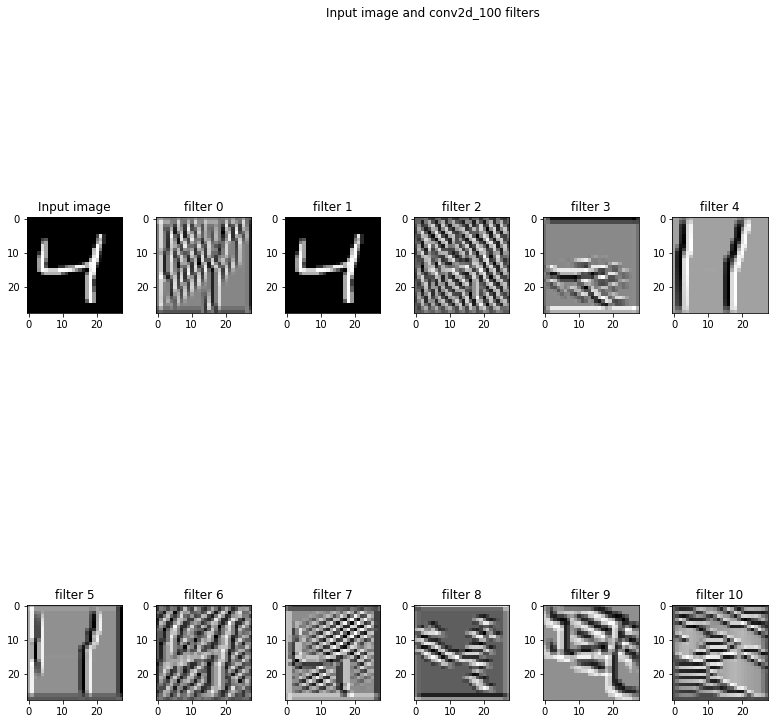

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_100'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()